
# Dataset

The dataset is the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) that comes with [Statsmodels](http://statsmodels.sourceforge.net/). It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs


## Import modules

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import label_binarize

In [190]:
dta =pd.read_csv('affairs.csv')
print dta.dtypes
dta

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int64
dtype: object


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


# 1. Couples typiques

a.

Ici les variables catégorielles sont occupation et occupation_husb ; on n'oublie pas de les transformer en variables binaires pour ne pas fausser la mesure de distance euclidienne, qui n'aurait pas de sens pour ces deux variables.

In [212]:
dta_ohe = pd.get_dummies(dta, columns=["occupation", "occupation_husb"])
dta_ohe

,rate_marriage,age,yrs_married,children,religious,educ,affairs,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [192]:
from sklearn.cluster import KMeans

Il suffit de faire comme suit pour partionner en n_clusters le dataset.

b. Cherchons le nombre optimal de clusters.

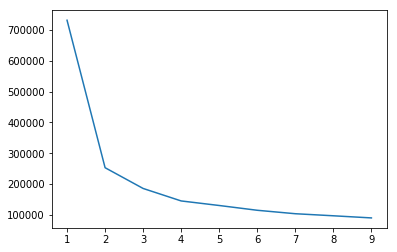

In [194]:
liste = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i).fit(dta_ohe)
    liste.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), liste)

c.

Comme vu en cours, pour le clustering, vu que l'on ne sait pas vraiment ce que l'on cherche, on choisi en général le nombre de clustering le plus grand qui "vaille encore le coup" : il s'agit des nombres aux alentours du "coude" que fait la courbe. Ici on choisit de fixer n_cluster = 4.

In [195]:
kmeans = KMeans(n_clusters=4).fit(dta_ohe)

In [196]:
kmeans.cluster_centers_

array([[  4.00589102e+00,   3.36384389e+01,   1.48634021e+01,
          2.39985272e+00,   2.53240059e+00,   1.39116348e+01,
          4.99052512e-01,   4.32989691e-01,   1.47275405e-03,
          1.56111929e-01,   4.08689249e-01,   2.84241532e-01,
          1.35493373e-01,   1.39911635e-02,   4.41826215e-03,
          1.89248895e-01,   8.32106038e-02,   3.07805596e-01,
          3.18851252e-01,   9.64653903e-02],
       [  4.24512821e+00,   2.17074359e+01,   2.62794872e+00,
          3.59743590e-01,   2.33846154e+00,   1.38076923e+01,
          9.16201774e-01,   2.15897436e-01,   1.23076923e-02,
          1.54358974e-01,   5.25128205e-01,   2.11282051e-01,
          8.92307692e-02,   7.69230769e-03,   7.43589744e-02,
          2.63589744e-01,   7.23076923e-02,   3.41025641e-01,
          2.14358974e-01,   3.43589744e-02],
       [  3.93363330e+00,   4.12013498e+01,   2.23638920e+01,
          3.22440945e+00,   2.65916760e+00,   1.38785152e+01,
          3.64166310e-01,   4.20697413e-01

Voici les 4 clusters trouvés dans le data set. Je vais décrire l'identité des centres des clusters, et extraire les qualités générales dudit groupe.

--------------------------------

1. Note de mariage : 4.25 ; Âge femme : 21.7 ans ; Années de mariage : 2.6 ; Enfants : 3.6 ; Religieux : Midly-Fairly ; Education : Some college ; Affairs : Assez peu ; Femme : White-colloar ; Mari : Farmer or Teacher (ou leur catégorie)


2. Note de mariage : 3.93 ; Âge femme : 41.2 ans ; Années de mariage : 22.3 ; Enfants : 3.22 ; Religieux : Midly-Fairly ; Education : Some college ; Affairs : Pas rare ; Femme : White-colloar or Teacher ; Mari : Businessman or Teacher (ou leur catégorie)


3. Note de mariage : 4 ; Âge femme : 33.6 ans ; Années de mariage : 14.8 ; Enfants : 2.4 ; Religieux : Midly-Fairly ; Education : Some college ; Affairs : Pas rare ; Femme : White-colloar or Teacher ; Mari : Businessman or Teacher (ou leur catégorie)


4. Note de mariage : 4.12 ; Âge femme : 27.9 ans ; Années de mariage : 5.6 ; Enfants : 0.95 ; Religieux : Midly-Fairly ; Education : Some college-College graduate ; Affairs : Assez peu ; Femme : Farming or White-colloar ; Mari : Businessman or Teacher (ou leur catégorie)

# 2. Prédiction de l'occupation de la femme du couple

a.

Import des modules nécessaires

In [197]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

On sépare le dataset en data et target, puis on sépare le set en 70% pour le train, 30% pour le test.

In [235]:
dta_1 = pd.get_dummies(dta, columns=["occupation_husb"])
dta_1

,rate_marriage,age,yrs_married,children,religious,educ,occupation,affairs,affair,label_cluster,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,0.111111,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,3.230769,1,2,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,1.400000,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,0.727273,1,2,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.666666,1,0,0.0,0.0,0.0,1.0,0.0,0.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.666666,1,0,0.0,0.0,0.0,1.0,0.0,0.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,0.852174,1,1,0.0,0.0,0.0,1.0,0.0,0.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,1.826086,1,1,0.0,0.0,1.0,0.0,0.0,0.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,4.799999,1,3,0.0,0.0,1.0,0.0,0.0,0.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,1.333333,1,0,0.0,0.0,0.0,0.0,1.0,0.0


In [236]:
X = dta_1[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs', 'affair',
           'occupation_husb_1.0', 'occupation_husb_2.0', 'occupation_husb_3.0', 'occupation_husb_4.0',
           'occupation_husb_5.0', 'occupation_husb_6.0']]
y = dta_1['occupation']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

On standardize les variables

In [238]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

On effectue ensuite une gridsearch avec cross validation sur 3 folds (vu en TP)

In [239]:
from sklearn import grid_search

# On crée la liste des classifiers, pour plus de clarté dans le code :
classifiers = [
    Perceptron(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()
    ]

nom_classifiers = [
    "Perceptron",
    "KNeighborsClassifier",
    "LogisticRegression",
    "DecisionTreeClassifier",
    "SVC"
    ]

#Idem avec les paramètres des classifiers ci-dessus. On peut ainsi facilement y avoir accès et les modifier :
parameters = [
    {'alpha':[0.001, 0.01, 0.1, 1], 'eta0':[0.1, 0.05, 0.01, 0.005], 'n_iter':[2, 5, 10, 10, 100],
              'max_iter':[10, 20, 50, 100]},
    {'n_neighbors':[1, 2, 5, 10], 'p':[1, 2, 5], 'weights':['uniform', 'distance'], 'leaf_size':[20, 30, 40, 50]},
    {'C':[500, 1000, 2000], 'random_state':[0, 1, 2, 5]},
    {'max_depth':[None, 1, 2, 3, 4], 'splitter':['best'], 'max_leaf_nodes':[None, 2, 5]},
    {'kernel':['linear', 'rbf'], 'C':[1, 2, 5], 'gamma':[0.05, 0.1, 0.5, 1], 'random_state':[0, 1, 2]}
    ]


resultats_grid = []
i = 0
while i < len(classifiers):
    clf = grid_search.GridSearchCV(classifiers[i], parameters[i], cv=3)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)

    print ('Classifier : %r' % (nom_classifiers[i]))
    print ('Best score en train : %r' % (clf.best_score_))
    print ('Best params : %r' % (clf.best_params_))
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))
    print ('Score en test : %r\n\n' % (clf.score(X_test_std,y_test)))
    i += 1

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

Classifier : 'Perceptron'
Best score en train : 0.47127468581687615
Best params : {'alpha': 0.001, 'max_iter': 10, 'eta0': 0.1, 'n_iter': 5}
Misclassified samples: 1106
Accuracy: 0.42
Score en test : 0.42094240837696334


Classifier : 'KNeighborsClassifier'
Best score en train : 0.5327648114901257
Best params : {'n_neighbors': 10, 'weights': 'uniform', 'leaf_size': 50, 'p': 1}
Misclassified samples: 911
Accuracy: 0.52
Score en test : 0.52303664921465964


Classifier : 'LogisticRegression'
Best score en train : 0.5825852782764811
Best params : {'C': 500, 'random_state': 0}
Misclassified samples: 807
Accuracy: 0.58
Score en test : 0.57748691099476435


Classifier : 'DecisionTreeClassifier'
Best score en train : 0.5870736086175943
Best params : {'max_leaf_nodes': 2, 'max_depth': None, 'splitter': 'best'}
Misclassified samples: 819
Accuracy: 0.57
Score en test : 0.57120418848167542


Classifier : 'SVC'
Best score en train : 0.5868491921005387
Best params : {'kernel': 'linear', 'C': 1, 'ran

On arrive en test à près de 58% de prédictions justes sur la classe d'occupation de la femme du couple (le meilleur classifieur est la régression logistique sur notre dataset).

Le but va maintenant être de réduire le dataset uniquement aux variables qui ont une réelle importance dans la prédiction de l'occupation de la femme du couple.
Pour se faire, nous allons réaliser une recursive backward elimination.

b.

In [203]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

In [204]:
print X_train.shape
print y_train.shape

(4456, 8)
(4456,)


In [205]:
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=3)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


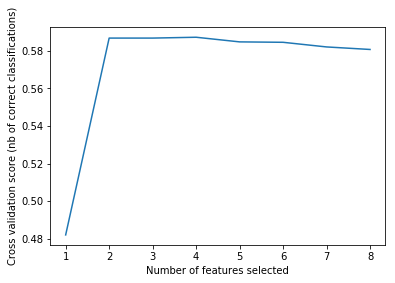

In [206]:
# Plot du nombre de features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [207]:
features_cols = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs']

In [208]:
features_to_consider = []
for ind in range(0, len(features_cols)):
    if rfecv.support_[ind] == True:
        features_to_consider.append(features_cols[ind])
print 'Selected features are %s \n' %(features_to_consider)
print 'Score Recursive Backward Elimination =%f' %(rfecv.score(X_test, y_test))

Selected features are ['religious', 'educ', 'occupation_husb', 'affairs'] 

Score Recursive Backward Elimination =0.570681


On a donc nos 4 features pertinents (nombre optimal) : religious, educ, occupation_husb et affairs. Considérer uniquement ces features est l'opération la plus efficiente lorsque l'on cherche à prédire l'occupation de la femme de la famille.

c.

On a effectivemment de la causalité entre les variables d'après les résultats précédents puisque 4 variables arrivent à décrire aussi bien la sortie que l'ensemble des variables disponibles.

d.

C'est parti, créons le cluster des features qui nous intéressent :

In [243]:
features_entree = dta_ohe[['rate_marriage', 'age', 'yrs_married', 'children', 'religious',
                           'educ', 'affairs', 'affair', 'occupation_husb_1.0',
                           'occupation_husb_2.0', 'occupation_husb_3.0', 'occupation_husb_4.0', 
                           'occupation_husb_5.0', 'occupation_husb_6.0']]
features_entree

,rate_marriage,age,yrs_married,children,religious,educ,affairs,affair,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0.0,0.0,0.0,1.0,0.0,0.0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,1,0.0,0.0,0.0,1.0,0.0,0.0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,1,0.0,0.0,0.0,1.0,0.0,0.0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,1,0.0,0.0,1.0,0.0,0.0,0.0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,1,0.0,0.0,1.0,0.0,0.0,0.0
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333,1,0.0,0.0,0.0,0.0,1.0,0.0


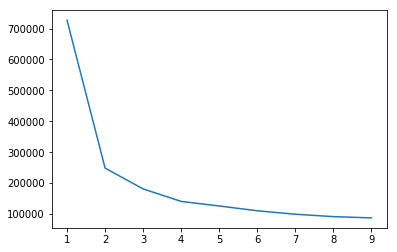

In [217]:
liste = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i).fit(features_entree)
    liste.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), liste)

Comme tout à l'heure, le nombre optimal de clusters est 4

In [228]:
kmeans2 = KMeans(n_clusters=4).fit(features_entree)

Création de la variable supplémentaire dans notre dataset

In [258]:
dta_1['label_cluster'] = kmeans2.labels_
dta_1_k = pd.get_dummies(dta_1, columns=["label_cluster"])

In [259]:
dta_1_k

,rate_marriage,age,yrs_married,children,religious,educ,occupation,affairs,affair,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,label_cluster_0,label_cluster_1,label_cluster_2,label_cluster_3
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,0.111111,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,3.230769,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,1.400000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,0.727273,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.666666,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.666666,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,0.852174,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,1.826086,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,4.799999,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,1.333333,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [261]:
X_k = dta_1_k[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs', 'affair',
               'occupation_husb_1.0', 'occupation_husb_2.0', 'occupation_husb_3.0', 'occupation_husb_4.0',
               'occupation_husb_5.0', 'occupation_husb_6.0', 'label_cluster_0', 'label_cluster_1',
               'label_cluster_2', 'label_cluster_3']]

y_k = dta_1_k['occupation']

X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(
    X_k, y_k, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_k_train)
X_k_train_std = sc.transform(X_k_train)
X_k_test_std = sc.transform(X_k_test)

In [262]:
resultats_grid = []
i = 0
while i < len(classifiers):
    clf = grid_search.GridSearchCV(classifiers[i], parameters[i], cv=3)
    clf.fit(X_k_train_std, y_k_train)
    y_k_pred = clf.predict(X_k_test_std)

    print ('Classifier : %r' % (nom_classifiers[i]))
    print ('Best score en train : %r' % (clf.best_score_))
    print ('Best params : %r' % (clf.best_params_))
    print('Misclassified samples: %d' % (y_k_test != y_k_pred).sum())
    print('Accuracy: %.2f' % (accuracy_score(y_k_test, y_k_pred)))
    print ('Score en test : %r\n\n' % (clf.score(X_k_test_std,y_k_test)))
    i += 1

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will 

Classifier : 'Perceptron'
Best score en train : 0.45466786355475763
Best params : {'alpha': 0.001, 'max_iter': 10, 'eta0': 0.1, 'n_iter': 5}
Misclassified samples: 1193
Accuracy: 0.38
Score en test : 0.37539267015706806


Classifier : 'KNeighborsClassifier'
Best score en train : 0.5244614003590664
Best params : {'n_neighbors': 10, 'weights': 'uniform', 'leaf_size': 50, 'p': 1}
Misclassified samples: 914
Accuracy: 0.52
Score en test : 0.52146596858638739


Classifier : 'LogisticRegression'
Best score en train : 0.5839317773788151
Best params : {'C': 500, 'random_state': 0}
Misclassified samples: 809
Accuracy: 0.58
Score en test : 0.57643979057591621


Classifier : 'DecisionTreeClassifier'
Best score en train : 0.5870736086175943
Best params : {'max_leaf_nodes': 2, 'max_depth': None, 'splitter': 'best'}
Misclassified samples: 819
Accuracy: 0.57
Score en test : 0.57120418848167542


Classifier : 'SVC'
Best score en train : 0.5868491921005387
Best params : {'kernel': 'linear', 'C': 1, 'ran

Le résultat n'est pas saisissant, et équivalent au modèle précédent.
Regardons maintenant quelles sont les variables utiles et pertinentes.

Optimal number of features : 13


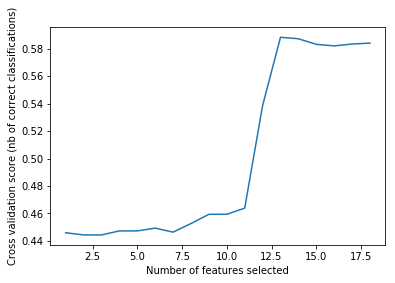

In [264]:
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=3)
rfecv.fit(X_k_train, y_k_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot du nombre de features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Ce résultat me surprend, je ne saurais le commenter.

# 3. Prédiction du nombre d'enfants

a.

Il s'agit d'un problème de regression, le nombre d'enfants n'était pas "dénombrable" dans le sens où il n'y a pas de classes définies de nombre d'enfants.

b.

On réalise la même étude qu'à la question 2.a, en modifiant les variables d'entrée et de sortie.

In [225]:
X_e = dta[['rate_marriage', 'age', 'yrs_married', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs', 'affair']]
y_e = dta['children']

X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(
    X_e, y_e, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_e_train)
X_e_train_std = sc.transform(X_e_train)
X_e_test_std = sc.transform(X_e_test)

X_e_test_std.shape

(1910, 9)

In [227]:
resultats_grid = []
i = 0
while i < len(classifiers):
    clf = grid_search.GridSearchCV(classifiers[i], parameters[i], cv=3)
    clf.fit(X_e_train_std, y_e_train)
    y_e_pred = clf.predict(X_e_test_std)
  
    print ('Classifier : %r' % (nom_classifiers[i]))
    print ('Best score en train : %r' % (clf.best_score_))
    print ('Best params : %r' % (clf.best_params_))
    print('Misclassified samples: %d' % (y_e_test != y_e_pred).sum())
    print('Accuracy: %.2f' % (accuracy_score(y_e_test, y_e_pred)))
    print ('Score en test : %r\n\n' % (clf.score(X_e_test_std,y_e_test)))
    i += 1

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ValueError: Unknown label type: (array([ 0. ,  1. ,  2. ,  3. ,  4. ,  5.5]),)

Problème que je n'arrive pas à résoudre.